# Prediction Using Descison Tree Classifier
---
The role of prediction using a decision tree in machine learning is quite significant. A decision tree is a type of supervised learning algorithm that is used for both classification and regression tasks. It works by creating a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.
The role of prediction using a decision tree in machine learning is quite significant. A decision tree is a type of supervised learning algorithm that is used for both classification and regression tasks. It works by creating a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.



`Task: ` Create teh Decision Tree classifier and visulaize it graphically. The purpose is if we feed any new data to classifier, it would be able to predict the right class accordingly. 

`Dataset Link:` https://drive.google.com/file/d/11Iq7YvbWZbt8VXjfm06brx66b10YiwK-/view

`Data Description:`
It includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

The columns in this dataset are:

- Id
- SepalLengthCm
- SepalWidthCm
- PetalLengthCm
- PetalWidthC
- Species 

By: Yashraj Mishra

# Importing required Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Loading Dataset

In [2]:
iris_df = pd.read_csv('iris.csv')
iris_df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [3]:
print(f'Number of rows:', iris_df.shape[0] ,' and Number of Columns: ', iris_df.shape[1])

Number of rows: 150  and Number of Columns:  6


In [4]:
iris_df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


- Checking for null values

In [5]:
def find_dirty_values(data):
    dtypes = pd.DataFrame(data.dtypes,columns=["Data Type"])
    dtypes["Unique Values"]=data.nunique().sort_values(ascending=True)
    dtypes["Null Values"]=data.isnull().sum()
    dtypes["% null Values"]=data.isnull().sum()/len(data)
    return dtypes.sort_values(by="Null Values" , ascending=False).style.background_gradient(cmap='YlOrRd',axis=0)

In [6]:
null_df = find_dirty_values(iris_df)
null_df

,Data Type,Unique Values,Null Values,% null Values
Id,int64,150,0,0.000000
SepalLengthCm,float64,35,0,0.000000
SepalWidthCm,float64,23,0,0.000000
PetalLengthCm,float64,43,0,0.000000
PetalWidthCm,float64,22,0,0.000000
Species,object,3,0,0.000000


In [7]:
iris_df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


# Data Visualization

<Axes: ylabel='count'>

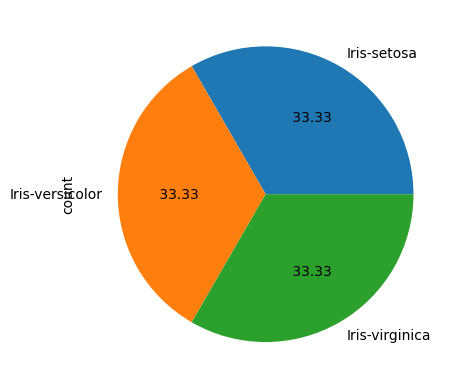

In [8]:
iris_df['Species'].value_counts().plot(kind = 'pie', autopct = '% .2f')

In [9]:
# types of species - univariate analysis {Non Graphical Analysis}
iris_df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [10]:
iris_df1 = iris_df.iloc[:, 0:4]


In [11]:
# numerical ananlyis = Heatmap
corelation_matrix  = iris_df1.corr()
corelation_matrix

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm
Id,1.000000,0.716676,-0.397729,0.882747
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000


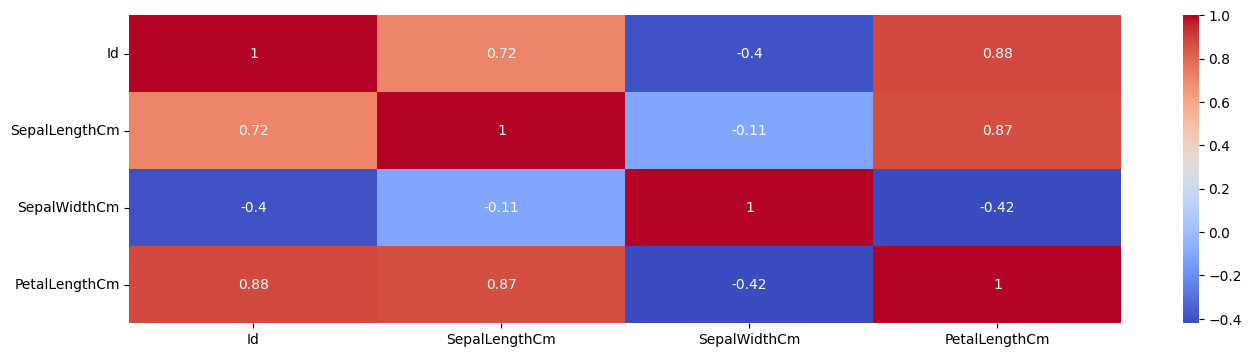

In [12]:
plt.figure(figsize=(16,4))
sns.heatmap(corelation_matrix, annot=True,cmap='coolwarm')
plt.show()

<Axes: ylabel='PetalWidthCm'>

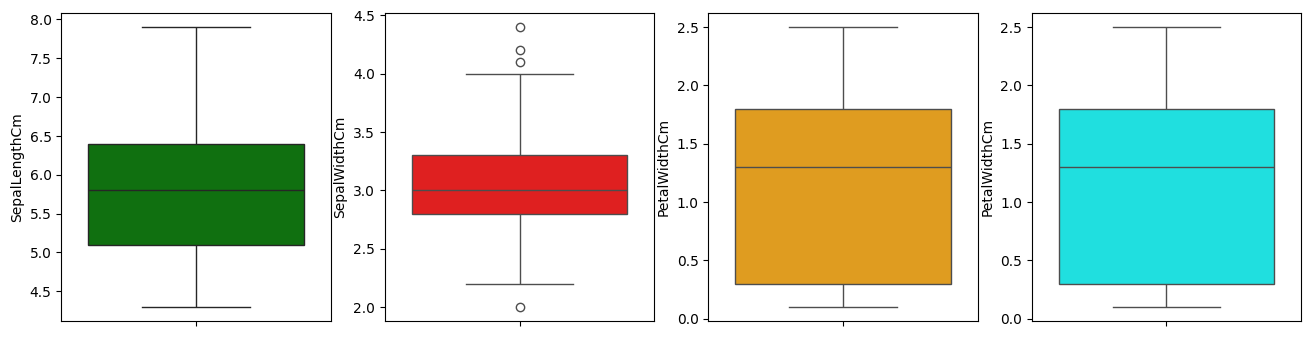

In [13]:
# plotting box plot to recognize outlier
plt.figure(figsize=(16,4))
plt.subplot(1,4,1)
sns.boxplot(data=iris_df,y='SepalLengthCm', color='green')
plt.subplot(1,4,2)
sns.boxplot(data=iris_df,y='SepalWidthCm',color='red')
plt.subplot(1,4,3)
sns.boxplot(data=iris_df,y='PetalWidthCm',color='orange')
plt.subplot(1,4,4)
sns.boxplot(data=iris_df,y='PetalWidthCm',color='cyan')

In [14]:
iris_df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

<Axes: ylabel='PetalWidthCm'>

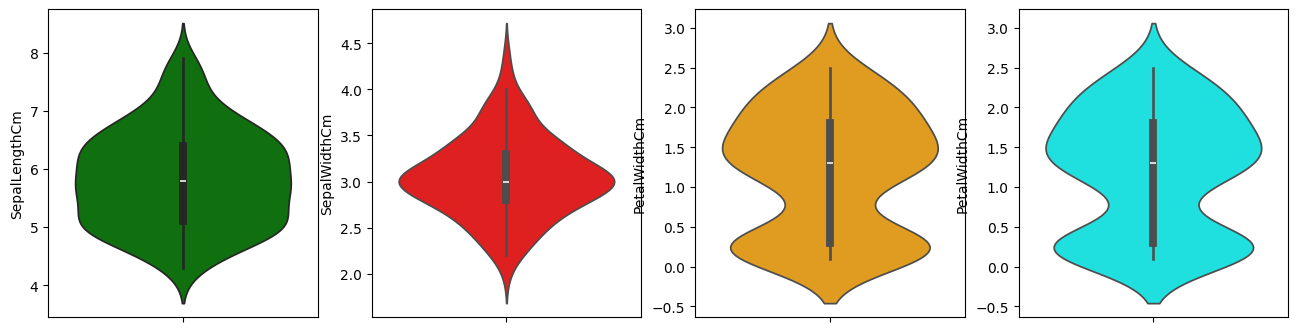

In [15]:
# plotting violin plot to recognize intensity of values
plt.figure(figsize=(16,4))
plt.subplot(1,4,1)
sns.violinplot(data=iris_df,y='SepalLengthCm', color='green')
plt.subplot(1,4,2)
sns.violinplot(data=iris_df,y='SepalWidthCm',color='red')
plt.subplot(1,4,3)
sns.violinplot(data=iris_df,y='PetalWidthCm',color='orange')
plt.subplot(1,4,4)
sns.violinplot(data=iris_df,y='PetalWidthCm',color='cyan')

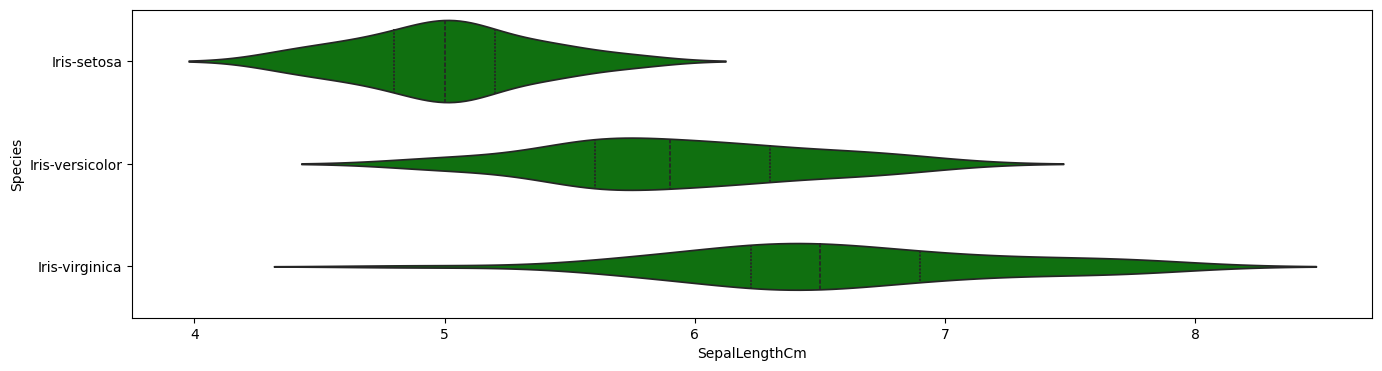

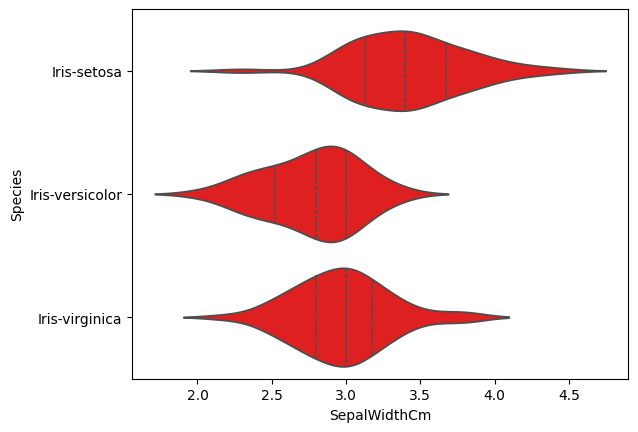

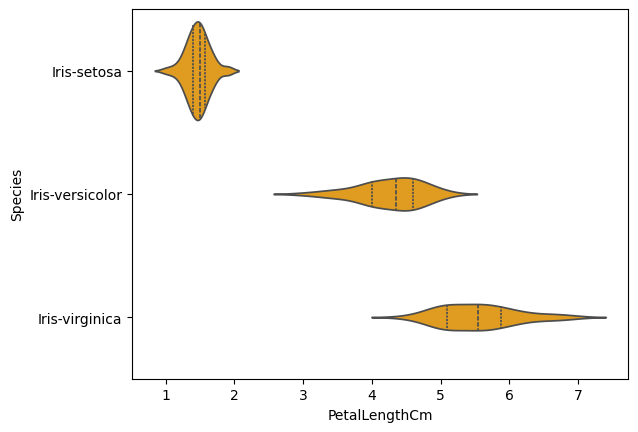

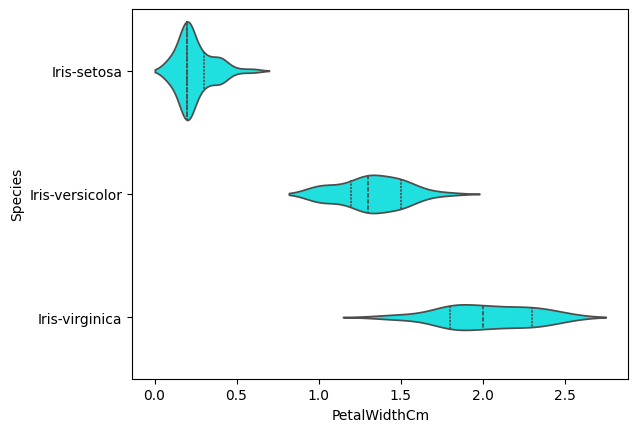

In [16]:
# Bivariate analysis : Numerical based on a Categorical data intensity
plt.figure(figsize = (16,4))
sns.violinplot(y='Species', x='SepalLengthCm', data=iris_df, inner='quartile', color='green')
plt.show()
sns.violinplot(y='Species', x='SepalWidthCm', data=iris_df, inner='quartile', color='red')
plt.show()
sns.violinplot(y='Species', x='PetalLengthCm', data=iris_df, inner='quartile', color='orange')
plt.show()
sns.violinplot(y='Species', x='PetalWidthCm', data=iris_df, inner='quartile', color='cyan')
plt.show()

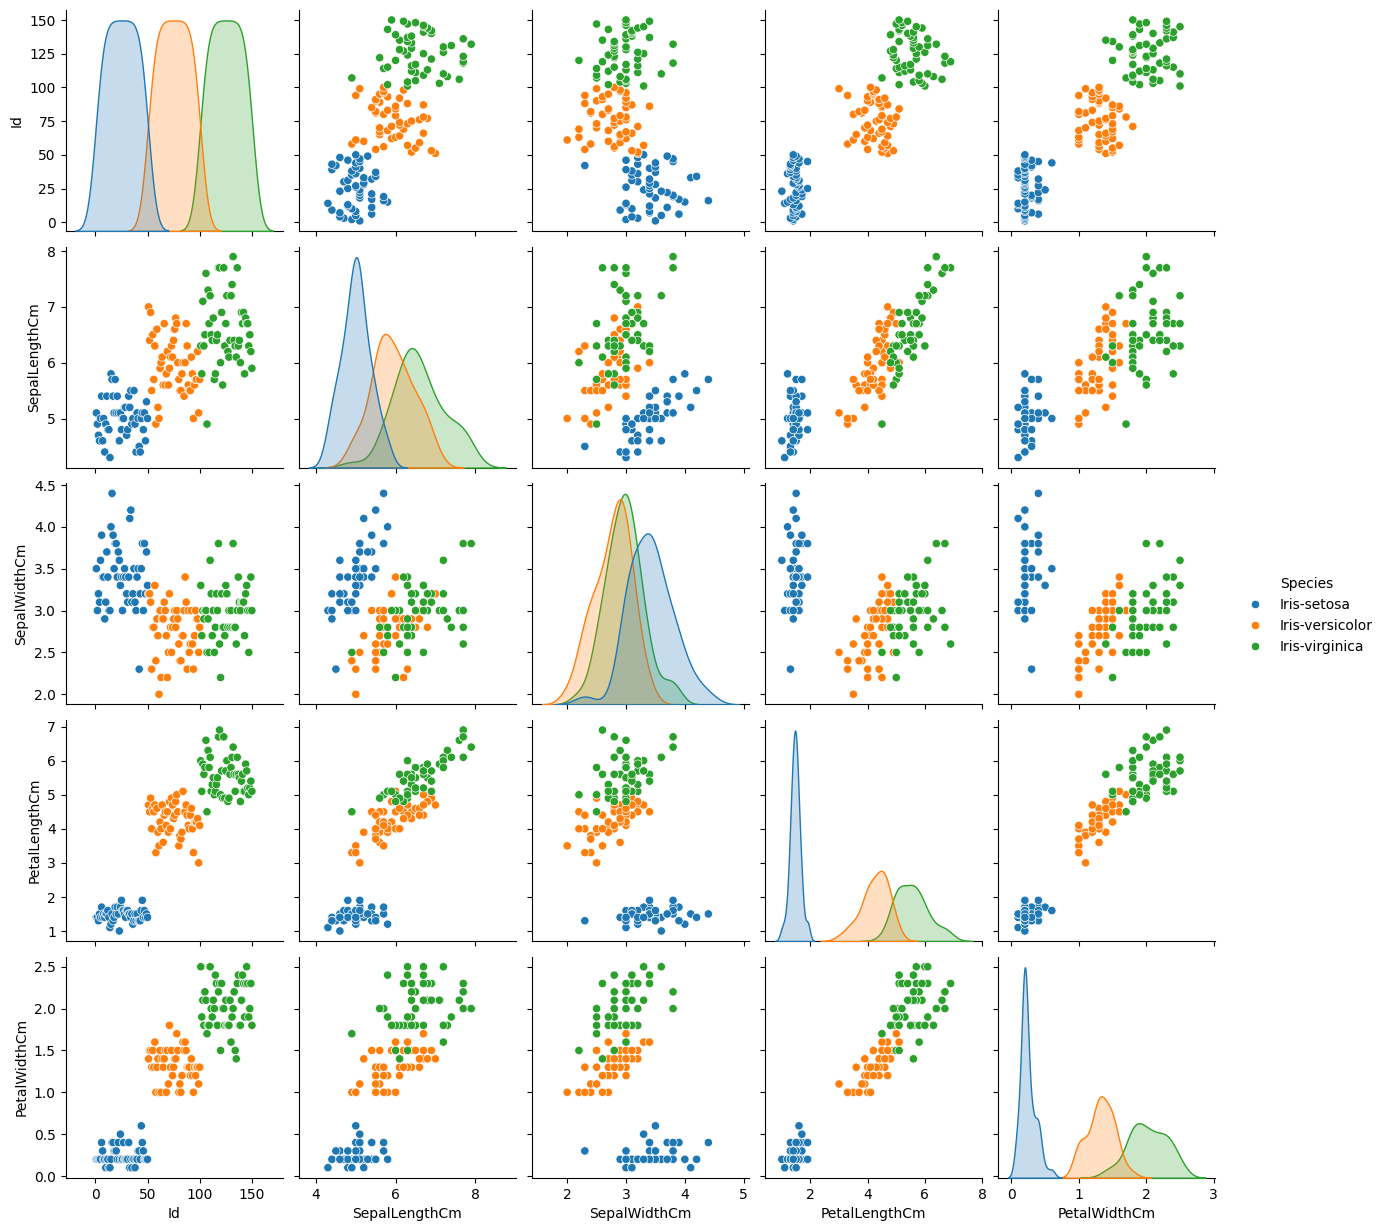

In [17]:
# Now, Plotting matix of graphs that enables visuals of relationship between each pair of variables in a dataset
sns.pairplot(iris_df,hue="Species")
plt.show()

# Traing And Testing 

In [18]:
# Building Model
X = iris_df.drop(columns=['Species'])
Y = iris_df['Species']
x_train , x_test , y_train , y_test = train_test_split(X , Y , test_size = 0.3)
print(f"Shape Of Training Data Set : ",x_train.shape)
print(f"Shape Of Testing Data Set :",x_test.shape)
print(f"Shape Of Train Label :",y_train.shape)
print(f"Shape Of Test Label :",y_test.shape)

Shape Of Training Data Set :  (105, 5)
Shape Of Testing Data Set : (45, 5)
Shape Of Train Label : (105,)
Shape Of Test Label : (45,)


In [19]:
def report(model):
    preds=model.predict(x_test)
    print(classification_report(preds,y_test))

# Applying Logistic Regression in the Training and Testing Dataset 

In [20]:
lg= LogisticRegression(max_iter=1000)
lg.fit(x_train,y_train)
y_pred=lg.predict(x_test)
score1=accuracy_score(y_test,y_pred)
report(lg)
accuracy_lg = round(score1*100,2)
print(f'Accuracy: {accuracy_lg}%')

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        17

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45

Accuracy: 100.0%


In [21]:
# Applying Decsion Tree Algorithm 

In [22]:
DTC = DecisionTreeClassifier()
DTC=DTC.fit(x_train,y_train)
y_pred=DTC.predict(x_test)
score3=accuracy_score(y_test,y_pred)
report(DTC)
accuracy_dtc = round(score3*100,2)
print(f'Accuracy: {accuracy_lg}%')

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        17

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45

Accuracy: 100.0%


In [23]:
# Comapring both the algorithm,

In [24]:
cols = [
    ["Logistic Regression",accuracy_lg],
    ["Decision Trees", accuracy_dtc],
    ]
results = pd.DataFrame( cols,
                       columns = ["Model","Accuracy %"]).sort_values(
                        by="Accuracy %",ascending=False)
results.style.background_gradient(cmap='Set1')

,Model,Accuracy %
0,Logistic Regression,100.000000
1,Decision Trees,100.000000


# Result: 
Therefore both the algorithm works perfectly, But if we add more data according to the scaled value, Decision Tree will work more effectively.
Let's explore Data Visulaization of the model . 
Starting with implementing the Decision Tree Model using Standard Scaler.

# Decision Tree Model

In [25]:
iris_df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [26]:
std = StandardScaler()
X = std.fit_transform(X)

In [27]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3, random_state = 1)

In [28]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [29]:
y_pred = model.predict(x_test)
y_pred

array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor'], dtype=object)

In [30]:
# Accuracy Score of Model
acc = accuracy_score(y_test, y_pred)
print("The Accuracy of the Decision Tree Algorithms is : ", str(acc*100) + "%")
cm = confusion_matrix(y_test, y_pred)
cm

The Accuracy of the Decision Tree Algorithms is :  97.77777777777777%


array([[14,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 13]], dtype=int64)

In [31]:
lst = iris_df['Species'].unique().tolist()
df_cm = pd.DataFrame(data = cm, index = lst, columns = lst)
df_cm

,Iris-setosa,Iris-versicolor,Iris-virginica
Iris-setosa,14,0,0
Iris-versicolor,0,17,1
Iris-virginica,0,0,13


In [32]:
col = iris_df.columns.tolist()
print(col)

['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']


# Model Visualization 

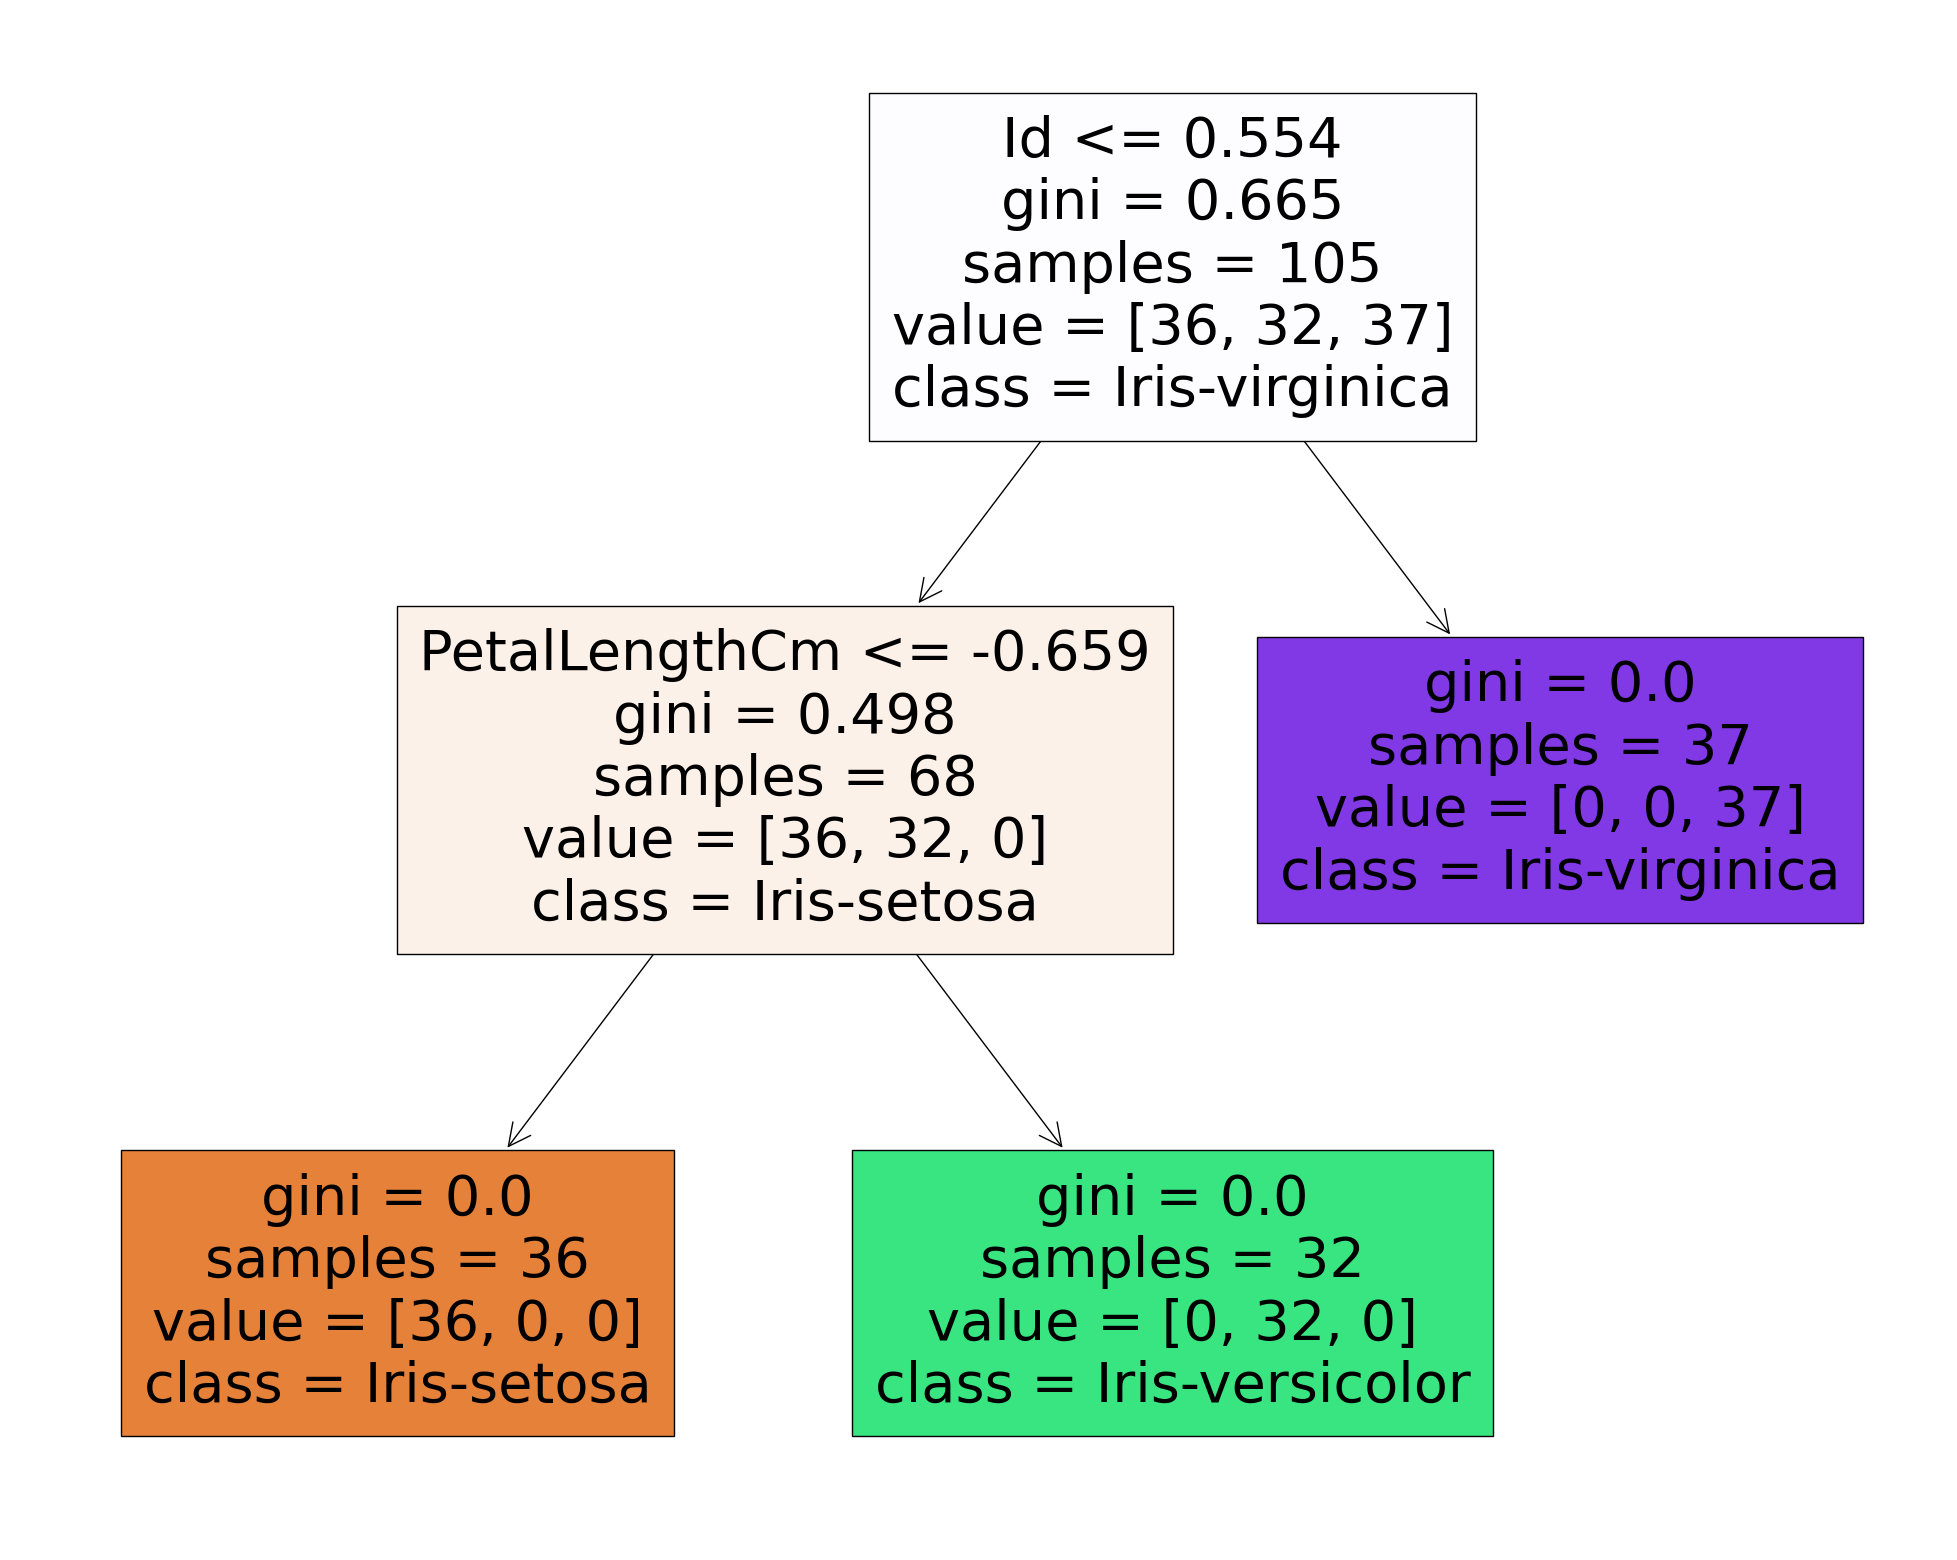

In [33]:
fig = plt.figure(figsize=(25, 20))
tree_img = plot_tree(model, feature_names = col, class_names = lst, filled = True)